<a href="https://colab.research.google.com/github/mmmhdp/nn_labs/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [118]:
import torch as tr
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import pyplot as plt
import seaborn as sns

# eda

In [119]:
train_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/hotel_data/train_final.csv')
test_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/hotel_data/test_final.csv')

In [120]:
train_dt

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.00,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.60,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.00,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.00,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.30,0,0,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,0,31,2017,June,26,27,0,1,1,...,D,D,0,No Deposit,0,Transient,119.00,0,2,2017-06-28
44634,Resort Hotel,0,116,2015,September,39,26,2,5,2,...,E,F,0,No Deposit,0,Transient,93.86,0,0,2015-10-03
44635,City Hotel,1,89,2017,April,14,3,1,2,2,...,A,A,0,No Deposit,0,Transient,99.00,0,1,2017-02-09
44636,City Hotel,0,277,2016,September,37,5,2,5,2,...,A,A,0,No Deposit,0,Transient-Party,89.14,0,1,2016-09-12


<ipython-input-121-593f6d1bb6d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dt.corr())


<Axes: >

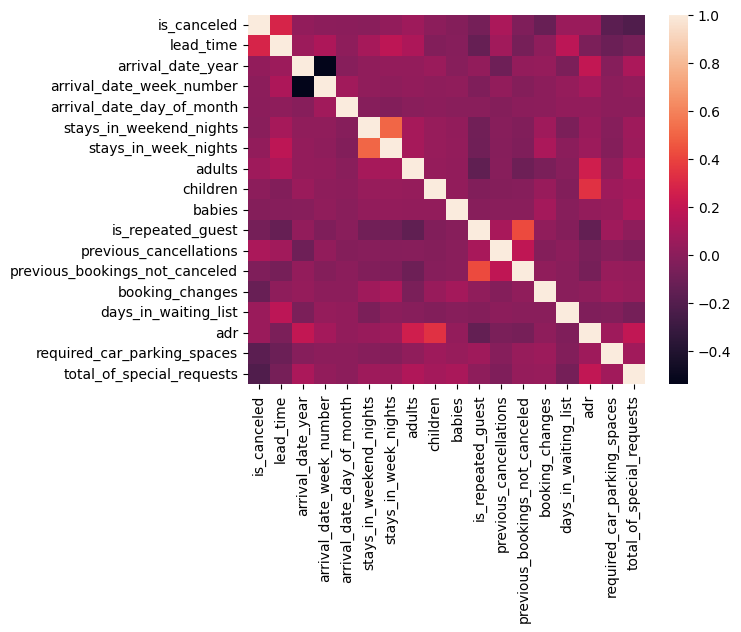

In [121]:
sns.heatmap(train_dt.corr())

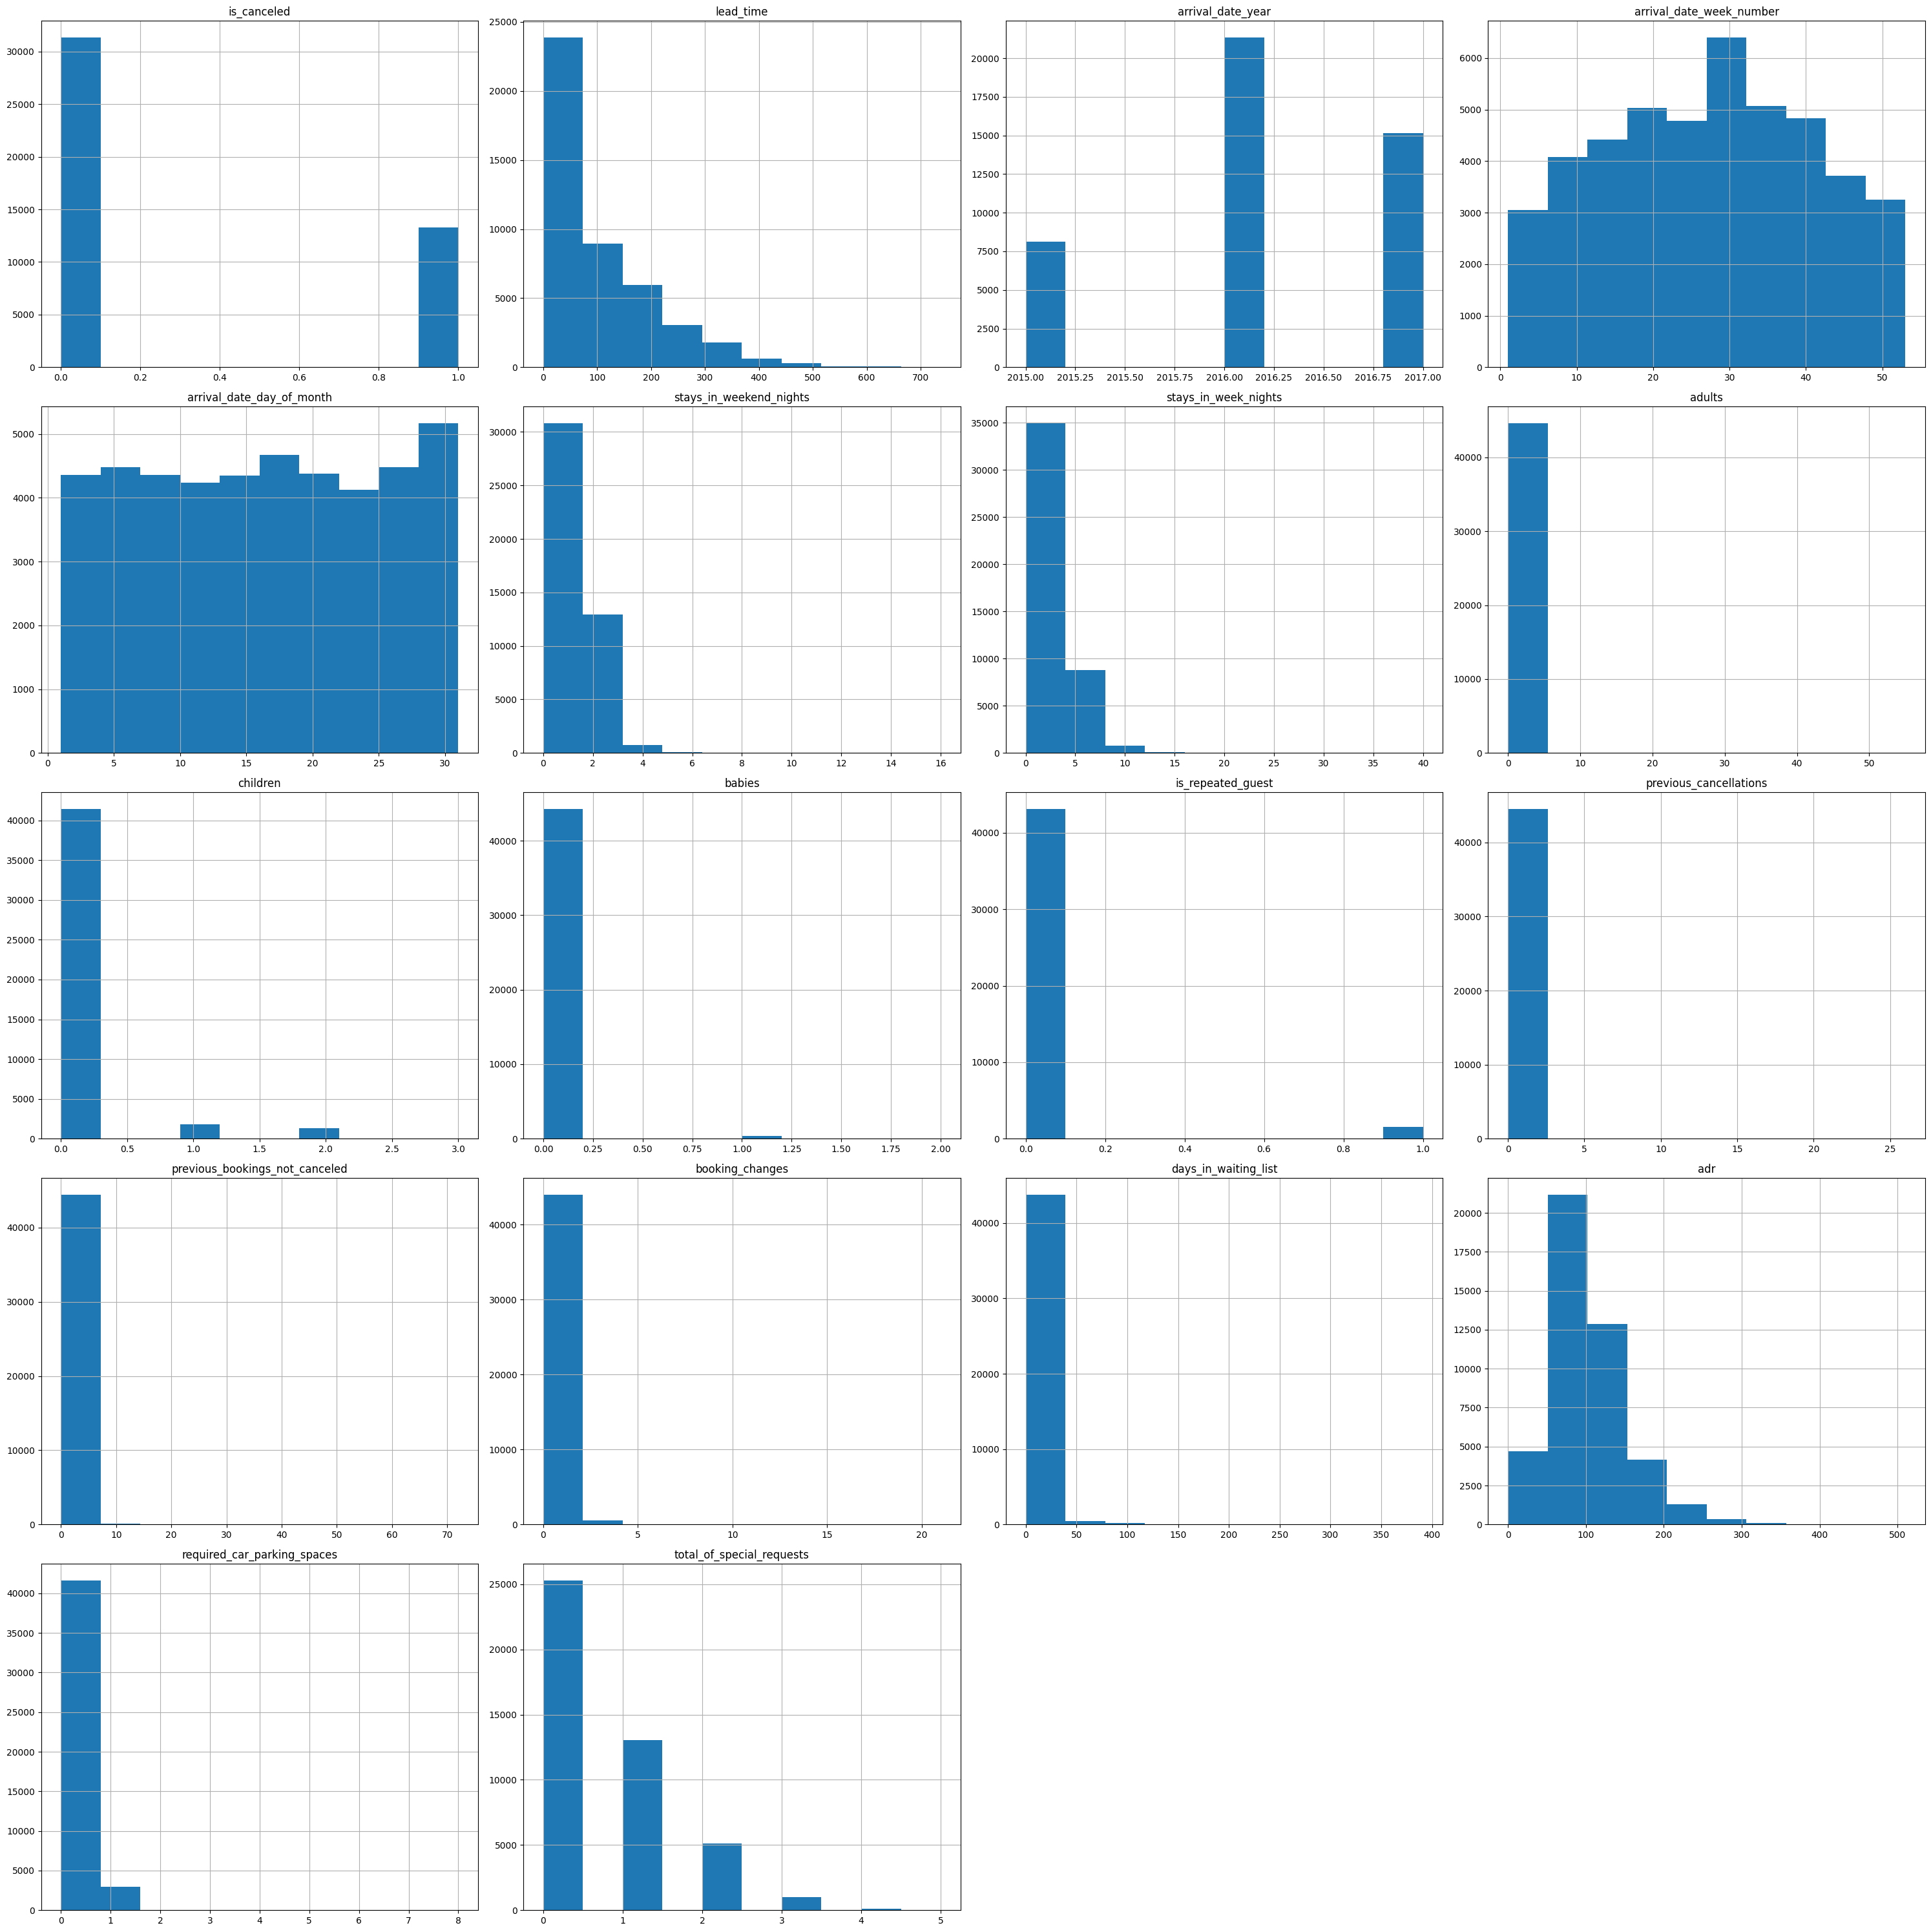

In [122]:
train_dt.hist(figsize=(30,30))
plt.tight_layout()
plt.show()

In [123]:
train_dt.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,44638.000000,44638.000000,44638.00000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000
mean,0.297594,99.395291,2016.15675,27.095166,15.778328,0.931516,2.507303,1.852883,0.102424,0.008289,0.034052,0.069672,0.140799,0.238026,2.149133,101.624687,0.067723,0.603253
std,0.457205,104.485734,0.70504,13.654692,8.807604,1.002021,1.928111,0.578898,0.393273,0.091649,0.181364,0.726281,1.540109,0.682989,17.134385,48.429930,0.255077,0.803659
min,0.000000,0.000000,2015.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2016.00000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.380000,0.000000,0.000000
50%,0.000000,65.000000,2016.00000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,154.000000,2017.00000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.00000,53.000000,31.000000,16.000000,40.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [124]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [125]:
# eda_scaler = preprocessing.StandardScaler()
# eda_encoder = preprocessing.LabelEncoder()

# sub_tr = train_dt.loc[:]

# categorical_features = sub_tr.loc[:, sub_tr.dtypes==object].columns
# for cat in categorical_features:
#     sub_tr[cat] = eda_encoder.fit_transform(sub_tr[cat]).float()

# sub_tr = sub_tr.astype(float)
# to_scale = [
#     "arrival_date_week_number",
#     "arrival_date_day_of_month"
# ]

# for f in to_scale:
#     sub_tr[f] = eda_scaler.fit_transform([[x] for x in sub_tr[f]])

# sub_tr = pd.DataFrame(sub_tr)

# sub_tr.hist(figsize=(30,30))
# plt.tight_layout()
# plt.show()

# model stuff

In [9]:
import torch as tr
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import pyplot as plt
import seaborn as sns

In [48]:
class HotelDataTransform():
    def __init__(self):
        self.data_scaler = preprocessing.PowerTransformer()
        self.sub_scaler = preprocessing.MinMaxScaler()
        self.le_cont = {}

    def fit_transform(self, data:pd.DataFrame):
        data = self.__transform(data)

        return data

    def transform(self, data:pd.DataFrame):
        return self.__transform(data, is_test=True)

    def __transform(self, data:pd.DataFrame, is_test=False):
        to_drop = [
            "arrival_date_year",
            "arrival_date_month",
            "meal",
            "country",
            ]
        data = data.drop(to_drop,axis=1)


        categorical_features = data.loc[:, data.dtypes==object].columns
        for cat in categorical_features:
            data_encoder = preprocessing.LabelEncoder()
            if not is_test:
                data[cat] = data_encoder.fit_transform(data[cat])
                self.le_cont[cat] = data_encoder

            else:
                data[cat] = self.le_cont[cat].fit_transform(data[cat])


        to_scale = [
            "arrival_date_week_number",
            "arrival_date_day_of_month"
        ]
        for f in to_scale:
            data[f] = self.data_scaler.fit_transform([[x] for x in data[f]])


        data = data.astype(float)

        # data = pd.DataFrame(self.sub_scaler.fit_transform(data), columns = data.columns)

        return data


In [11]:
class HotelTrainDataCont(Dataset):
    def __init__(self, X, y):
        self.X = tr.FloatTensor(X.to_numpy())
        self.y = tr.FloatTensor(y.to_numpy())


    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, ind):
        return (self.X[ind], self.y[ind])


class HotelValidationDataCont(Dataset):

    def __init__(self, X):
        self.X = tr.FloatTensor(X.to_numpy())

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, ind):
        return self.X[ind]

In [12]:
class DataPreprocessor():
    def __init__(self,
                 train_data_path, validation_data_path,
                 target_column_name,
                 transformer = HotelDataTransform,
                 train_data_cont = HotelTrainDataCont,
                 validation_data_cont = HotelValidationDataCont):
        self.transformer = transformer()
        self.target_column_name = target_column_name
        self.train_data_path = train_data_path
        self.validation_data_path = validation_data_path

        self.train_data_cont = train_data_cont
        self.validation_data_cont = validation_data_cont

        self.train_data = self.__preprocess_train_data()
        self.validation_data = self.__preprocess_validation_data()

        self.__splitted_train_data = self.__get_splitted_train_data()

    def get_preprocess_data(self, is_test=False):
        return self.validation_data if is_test else self.train_data

    def __get_splitted_train_data(self):
        features = self.train_data.drop(columns=[self.target_column_name])
        target = self.train_data[self.target_column_name]
        tra_fts, tes_fts, tra_targ, tes_targ =  train_test_split(features, target,
                                train_size=0.75,
                                shuffle=True,
                                random_state=42)
        return tra_fts, tes_fts, tra_targ, tes_targ

    def get_train_data_cont(self):
        train_features, _ , train_target, _ = self.__splitted_train_data
        train_cont = self.train_data_cont(train_features, train_target)
        return train_cont

    def get_test_data_cont(self):
        _ , test_features , _ , test_target = self.__splitted_train_data
        train_cont = self.train_data_cont(test_features, test_target)
        return train_cont

    def get_validation_data_cont(self):
        return self.validation_data_cont(self.validation_data)

    def __preprocess_train_data(self):
        raw_train_data = pd.read_csv(self.train_data_path)

        train_data = self.transformer.fit_transform(raw_train_data)
        return train_data

    def __preprocess_validation_data(self):
        raw_validation_data = pd.read_csv(self.validation_data_path)

        test_data = self.transformer.transform(raw_validation_data)
        return test_data

In [67]:
class HotelClNn(nn.Module):
    def __init__(self, num_of_entry_neurs, num_of_inner_layers_neurs):
        super().__init__()
        self.entry = tr.nn.Linear(num_of_entry_neurs, num_of_inner_layers_neurs)
        # self.act_1 = tr.nn.functional.sigmoid
        self.act_2 = tr.nn.functional.relu
        # self.act = tr.nn.functional.tanh

        # self.drop =m = nn.Dropout(p=0.5)

        self.inner_1 = tr.nn.Linear(num_of_inner_layers_neurs, num_of_inner_layers_neurs)

        self.inner_2 = tr.nn.Linear(num_of_inner_layers_neurs, num_of_inner_layers_neurs)

        self.inner_3 = tr.nn.Linear(num_of_inner_layers_neurs, num_of_inner_layers_neurs)

        self.output = tr.nn.Linear(num_of_inner_layers_neurs, 1)

        self.final = tr.nn.Softmax(dim=1)

    def forward(self, features):
        features = self.entry(features)
        features = self.act_2(features)
        # features = self.drop(features)

        features = self.inner_1(features)
        features = self.act_2(features)
        # features = self.drop(features)


        features = self.inner_2(features)
        features = self.act_2(features)
        # features = self.drop(features)


        features = self.inner_3(features)
        features = self.act_2(features)
        # features = self.drop(features)


        features = self.output(features)

        features = self.final(features)

        return features

In [69]:
class HotelClassifier():
    def __init__(self,
                 dataset, network, loss_f,
                 device,
                 optimizer,
                 scheduler,
                 permutate,
                #  learning_rate,
                 epoch_amount,
                 batch_size,
                 max_batches_per_epoch,
                 early_stopping
                 ):
        self.dataset = dataset[0]
        self.test_dataset = dataset[1]

        self.init_model = network
        self.best_model = network

        self.loss_f = loss_f
        self.device = device
        self.optimizer = optimizer
        self.scheduler = scheduler

        self.permutate = permutate
        # self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount

        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch

        self.early_stopping = early_stopping
        self.metric_value_on_validation_data_cont= []

    def predict(self, features):
        return self.best_model(features)


    def fit(self, train_dataset):

        network = self.init_model
        device = tr.device(self.device)

        network = network.to(device)

        opt = self.optimizer
        sch = self.scheduler

        loaded_data = DataLoader(train_dataset, batch_size = self.batch_size, shuffle = self.permutate)

        best_val_loss = float("inf")
        best_epoch = 0


        for epoch in range(self.epoch_amount):

            network.train()

            mean_loss, batch_time = self.__epoch(network, loaded_data, opt, sch, device)

            best_val_loss = min(mean_loss, best_val_loss)
            best_epoch = epoch if mean_loss == best_val_loss else best_epoch
            self.best_model = network if best_epoch == epoch else self.best_model

            print(f"epoch : {epoch} mean_loss: {mean_loss} batch_time: {batch_time}")

            network.eval()

            curr_metric_on_validation_set = self.__reality_check(device)

            print(f"Accuracy on test: {curr_metric_on_validation_set}")

            if self.__is_early_stop(curr_metric_on_validation_set):
                print("Validation metric not improving")
                break


    def __is_early_stop(self, metrics_value):

        self.metric_value_on_validation_data_cont.append(metrics_value)
        epsilon = abs(metrics_value) - abs(min(self.metric_value_on_validation_data_cont))
        valid_percent = 5/100
        if metrics_value * valid_percent >= epsilon:
            self.early_stopping -= 1

        return False if self.early_stopping > 0 else True



    def __reality_check(self, device):
        test_features = self.test_dataset.X.to(device)
        test_real_target = self.test_dataset.y

        test_pred_target = self.predict(test_features)

        pred_target = np.array(test_pred_target.detach().cpu().flatten())

        real_target = np.array(test_real_target.flatten())
        pred_target = np.array([(lambda el: 1 if el>0.3 else 0)(el) for el in pred_target])

        return accuracy_score(real_target, pred_target)



    def __epoch(self, network, loaded_data, opt, sch, device):
        start_time_stamp = dt.datetime.now()

        n_batches = 0
        mean_loss_per_batch = 0

        for features_batch, target_batch in loaded_data:

            opt.zero_grad()

            features_batch = features_batch.to(device)
            target_batch = target_batch.to(device)

            pred_target = network(features_batch)

            target = target_batch.reshape(pred_target.shape)
            loss = self.loss_f(pred_target, target)
            loss.backward()
            opt.step()

            mean_loss_per_batch+=loss
            n_batches+=1

        sch.step()

        mean_loss_per_batch = float(mean_loss_per_batch)
        mean_loss = mean_loss_per_batch/n_batches

        finish_time_stamp = dt.datetime.now()
        batch_time = finish_time_stamp - start_time_stamp

        return mean_loss, batch_time

def staff():
    dpr_params = {
        "train_data_path" : "/content/drive/MyDrive/colab_notebooks/hotel_data/train_final.csv",
        "validation_data_path" : "/content/drive/MyDrive/colab_notebooks/hotel_data/test_final.csv",

        "target_column_name" : "is_canceled",
        "transformer" : HotelDataTransform,
        "train_data_cont" : HotelTrainDataCont,
        "validation_data_cont" : HotelValidationDataCont
        }
    dpr = DataPreprocessor(**dpr_params)

    network_params = {
        "num_of_entry_neurs" : 24,
        "num_of_inner_layers_neurs" : 512
    }
    network = HotelClNn(**network_params)

    # optimizer = tr.optim.RMSprop(network.parameters(), lr=1e-5)
    optimizer = tr.optim.Adam(network.parameters(), lr=1e-5)
    scheduler = tr.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

    regr_params = {
       "dataset": [dpr.get_train_data_cont(), dpr.get_test_data_cont()],
       "network": network,
    #    "loss_f": nn.HingeEmbeddingLoss(),
       "loss_f": nn.BCELoss(),
    #    "loss_f": nn.MSELoss(),
       "device" : 'cpu',
    #    "learning_rate": 1e-5,
       "optimizer" : optimizer,
       "scheduler" : scheduler,
       "permutate" : True,
       "epoch_amount" : 500,
       "batch_size" : 1024,
       "max_batches_per_epoch" : None,
       "early_stopping" : 5
    }
    regr = HotelClassifier(**regr_params)
    return dpr, network, regr

dpr, network, regr = staff()
dpr, network, regr

train_data = dpr.get_train_data_cont()
train_data.X, train_data.y

regr.fit(train_data)

epoch : 0 mean_loss: 70.31714607007575 batch_time: 0:00:02.451847
Accuracy on test: 0.29982078853046595
epoch : 1 mean_loss: 70.32499556107955 batch_time: 0:00:02.337436
Accuracy on test: 0.29982078853046595
epoch : 2 mean_loss: 70.3105986624053 batch_time: 0:00:02.289298
Accuracy on test: 0.29982078853046595
epoch : 3 mean_loss: 70.33415453361742 batch_time: 0:00:02.441184
Accuracy on test: 0.29982078853046595
epoch : 4 mean_loss: 70.30928918087122 batch_time: 0:00:02.635577
Accuracy on test: 0.29982078853046595
Validation metric not improving


In [37]:
test_data = dpr.get_test_data_cont()
test_data.X

tensor([[ 0.0000e+00,  7.7000e+01,  1.8785e-01,  ...,  0.0000e+00,
          0.0000e+00,  4.1100e+02],
        [ 1.0000e+00,  1.0800e+02,  1.1721e-01,  ...,  1.0000e+00,
          4.0000e+00,  8.4000e+02],
        [ 1.0000e+00,  1.0700e+02, -2.4354e-01,  ...,  1.0000e+00,
          0.0000e+00,  4.3700e+02],
        ...,
        [ 0.0000e+00,  1.5000e+02, -3.1736e-01,  ...,  0.0000e+00,
          0.0000e+00,  7.9300e+02],
        [ 0.0000e+00,  1.0000e+00,  9.3828e-01,  ...,  0.0000e+00,
          0.0000e+00,  1.8000e+02],
        [ 0.0000e+00,  1.1300e+02, -2.4354e-01,  ...,  0.0000e+00,
          0.0000e+00,  3.7200e+02]])

In [38]:
test_pred_target = regr.predict(test_data.X.to(tr.device('cpu')))
test_real_target = test_data.y.cpu()

pred_target = np.array(test_pred_target.detach().cpu())

real_target = np.array(test_real_target.cpu())
pred_target = np.array([(lambda el: 1 if el>0.3 else 0)(el) for el in pred_target])

accuracy_score(real_target, pred_target)

0.6771505376344086

In [39]:
validation_data = dpr.get_validation_data_cont()

pred_target = regr.predict(validation_data.X.to(tr.device('cpu')))

pred_target = np.array(pred_target.detach().cpu())
pred_target = np.array([(lambda el: 1 if el>0.3 else 0)(el) for el in pred_target])

pred_target

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
pred_dt = pd.DataFrame(pred_target)
pred_dt

,0
0,0
1,0
2,0
3,0
4,1
...,...
23520,0
23521,0
23522,0
23523,0


In [41]:
pred_dt.to_csv(path_or_buf = "output.csv",
               index_label="index",
               header = ["is_canceled"])